<a href="https://www.kaggle.com/code/muhammadareebkhan/fashion-mnist-classification?scriptVersionId=127882576" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## FASHION MNIST DATASET CLASSIFICATION

### IMPORTING LIBRARIES

In [20]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
print(torch.__version__)

1.13.0+cpu


In [21]:
import torchvision
import torchvision.transforms as transforms

### DEFINING TRANSFORM TO NORMALIZE THE INPUT

In [22]:

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

### TRAIN DATA

In [23]:
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)

In [24]:
trainset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

### TEST DATA

In [25]:
testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)

In [26]:
testset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

### CREATE THE DATALOADERS TO LOAD THE DATA INTO BATCHES DURING TRAINING AND TESTING

In [27]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

### VISUALIZATION

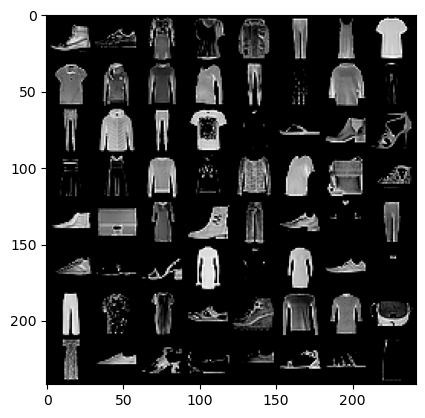

Ankle boot Sneaker Dress T-shirt/top


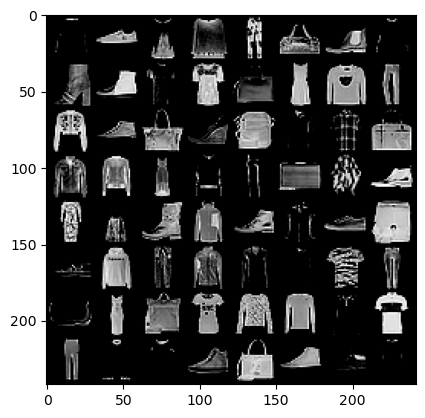

Pullover Sneaker Shirt T-shirt/top


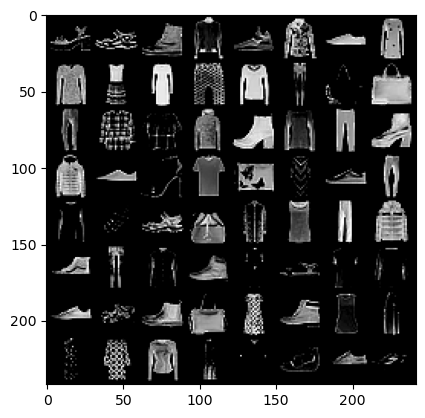

Sandal Sandal Ankle boot  Coat


In [28]:
# Define the classes for the labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

counter = 0
for images, labels in trainloader:
    # Plot the images
    img_grid = torchvision.utils.make_grid(images)
    img_np = img_grid.numpy()
    plt.imshow(np.transpose(img_np, (1, 2, 0)))
    plt.show()

    # Print the labels
    print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

    counter += 1
    if counter >= 3:
        break

### DEFINING THE NEURAL NETWORK MODEL

In [29]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### DEFINING THE LOSS FUNCTION AND OPTIMIZER

In [30]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [31]:
# Create lists to store loss and accuracy values
train_loss = []
val_loss = []
train_acc = []
val_acc = []

# Set the model to evaluation mode
net.eval()

# Loop over the validation set to calculate accuracy and loss
with torch.no_grad():
    for images, labels in testloader:
        # Forward pass
        outputs = net(images)
        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total = labels.size(0)
        correct = (predicted == labels).sum().item()
        val_acc.append(100 * correct / total)
        # Calculate loss
        loss = criterion(outputs, labels)
        val_loss.append(loss.item())


### TRAINING

In [32]:
num_epochs = 10
# Loop over the training set to calculate accuracy and loss
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total = labels.size(0)
        correct = (predicted == labels).sum().item()
        running_acc += 100 * correct / total
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            train_loss.append(running_loss / 100)
            train_acc.append(running_acc / 100)
            running_loss = 0.0
            running_acc = 0.0

[1,   100] loss: 2.300
[1,   200] loss: 2.289
[1,   300] loss: 2.272
[1,   400] loss: 2.233
[1,   500] loss: 2.090
[1,   600] loss: 1.579
[1,   700] loss: 1.065
[1,   800] loss: 0.902
[1,   900] loss: 0.832
[2,   100] loss: 0.767
[2,   200] loss: 0.728
[2,   300] loss: 0.703
[2,   400] loss: 0.690
[2,   500] loss: 0.689
[2,   600] loss: 0.649
[2,   700] loss: 0.656
[2,   800] loss: 0.647
[2,   900] loss: 0.630
[3,   100] loss: 0.589
[3,   200] loss: 0.622
[3,   300] loss: 0.592
[3,   400] loss: 0.580
[3,   500] loss: 0.594
[3,   600] loss: 0.580
[3,   700] loss: 0.558
[3,   800] loss: 0.564
[3,   900] loss: 0.544
[4,   100] loss: 0.519
[4,   200] loss: 0.539
[4,   300] loss: 0.542
[4,   400] loss: 0.522
[4,   500] loss: 0.539
[4,   600] loss: 0.514
[4,   700] loss: 0.516
[4,   800] loss: 0.505
[4,   900] loss: 0.495
[5,   100] loss: 0.493
[5,   200] loss: 0.503
[5,   300] loss: 0.499
[5,   400] loss: 0.501
[5,   500] loss: 0.478
[5,   600] loss: 0.464
[5,   700] loss: 0.479
[5,   800] 

### MODEL SUMMARY

In [33]:
!pip install torchsummary
from torchsummary import summary
summary(net, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 24, 24]             156
         MaxPool2d-2            [-1, 6, 12, 12]               0
            Conv2d-3             [-1, 16, 8, 8]           2,416
         MaxPool2d-4             [-1, 16, 4, 4]               0
            Linear-5                  [-1, 120]          30,840
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 44,426
Trainable params: 44,426
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.17
Estimated Total Size (MB): 0.22
----------------------------------------------------------------


### EVALUATE THE MODEL FOR TEST DATA

In [34]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 85 %


### Plot the training and validation loss over epochs

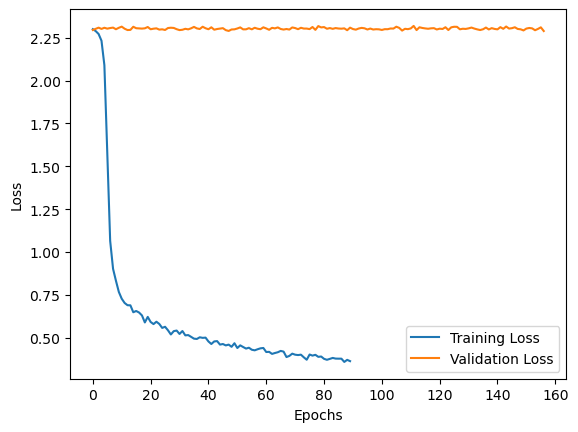

In [35]:
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plot the training and validation accuracy over epochs

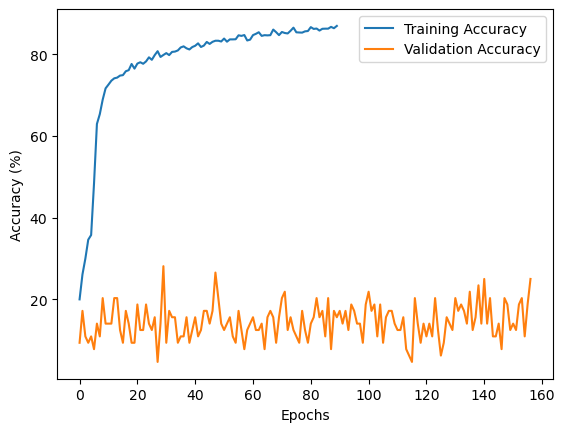

In [36]:
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

### visualize the predictions of a trained model on a small batch of test data

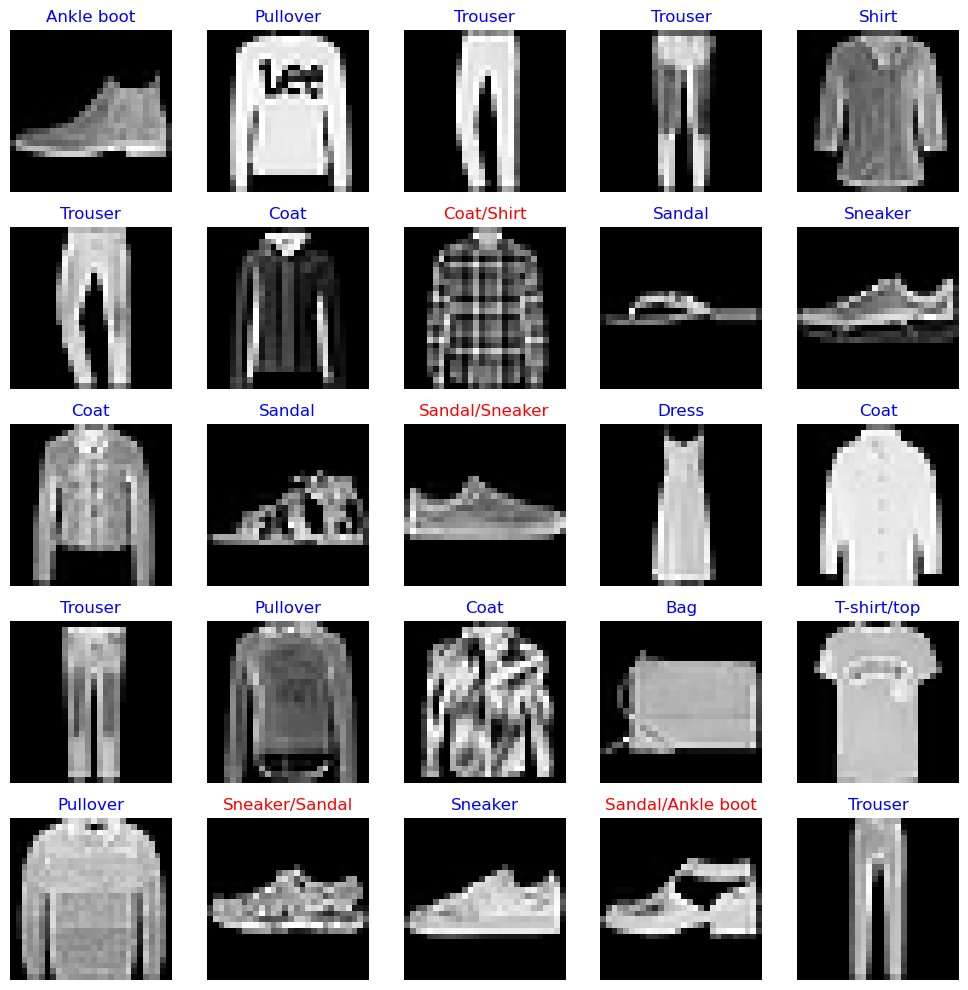

In [37]:
test_batch_size = 25
dataiter = iter(testloader)

images, labels = dataiter.__next__()

outputs = net(images)

_, predicted = torch.max(outputs, 1)

fig = plt.figure(figsize=(10, 10))
for i in range(test_batch_size):
    p = fig.add_subplot(5, 5, i+1)
    if predicted[i] == labels[i]:
        p.set_title("{}".format(classes[labels[i]]), color='blue')
    else:
        p.set_title("{}/{}".format(classes[predicted[i]],
                                    classes[labels[i]]), color='red')
    p.imshow(images[i].numpy().squeeze(), cmap='gray')
    p.axis('off')
plt.tight_layout()
